In [2]:
import numpy as np
import pykitti
import os
import xml_parser as xmlParser
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from print_utils import print_progress
from moviepy.editor import ImageSequenceClip

In [119]:
!mkdir data

In [120]:
cd data/

/media/sandeepgogadi/Data/AD/Kitti_lidar/KITTI-Dataset/data


In [121]:
!wget 'http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip'

--2018-03-20 22:37:58--  http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip
Resolving kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)... 192.124.27.130
Connecting to kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)|192.124.27.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 458643963 (437M) [application/zip]
Saving to: ‘2011_09_26_drive_0001_sync.zip’

2011_09_26_drive_00 100%[===================>] 437.40M   328KB/s    in 14m 41s 

2018-03-20 22:52:39 (508 KB/s) - ‘2011_09_26_drive_0001_sync.zip’ saved [458643963/458643963]



In [122]:
!wget 'http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_calib.zip'

--2018-03-20 22:52:39--  http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_calib.zip
Resolving kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)... 192.124.27.130
Connecting to kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)|192.124.27.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4068 (4.0K) [application/zip]
Saving to: ‘2011_09_26_calib.zip’

2011_09_26_calib.zi 100%[===================>]   3.97K  --.-KB/s    in 0s      

2018-03-20 22:52:40 (7.87 MB/s) - ‘2011_09_26_calib.zip’ saved [4068/4068]



In [123]:
!wget 'http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_tracklets.zip'

--2018-03-20 22:52:40--  http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_tracklets.zip
Resolving kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)... 192.124.27.130
Connecting to kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)|192.124.27.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280497 (274K) [application/zip]
Saving to: ‘2011_09_26_drive_0001_tracklets.zip’

2011_09_26_drive_00 100%[===================>] 273.92K   166KB/s    in 1.6s    

2018-03-20 22:52:42 (166 KB/s) - ‘2011_09_26_drive_0001_tracklets.zip’ saved [280497/280497]



In [124]:
ls

2011_09_26_calib.zip            2011_09_26_drive_0001_tracklets.zip
2011_09_26_drive_0001_sync.zip


In [125]:
!unzip 2011_09_26_drive_0001_sync.zip

Archive:  2011_09_26_drive_0001_sync.zip
   creating: 2011_09_26/2011_09_26_drive_0001_sync/oxts/
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/timestamps.txt  
   creating: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000017.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000083.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000043.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000059.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000062.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000009.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000106.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000075.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000046.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000

 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000051.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000029.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000106.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000046.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000098.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000071.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000076.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000048.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000080.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000043.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000078.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000010.png  
 extracting: 201

 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000014.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000005.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000056.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000057.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000018.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000009.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000096.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000051.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000029.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000106.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000046.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_01/data/0000000098.png  
 extracting: 201

 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000023.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000019.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000041.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000090.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000062.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000017.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000084.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000014.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000005.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000056.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000057.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000018.png  
 extracting: 201

 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000038.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000097.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000023.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000019.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000041.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000090.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000062.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000017.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000084.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000014.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000005.png  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000056.png  
 extracting: 201

 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000091.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000031.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000003.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000014.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000081.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000048.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000083.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000096.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000074.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000089.bin  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000047.bin  
 extracting: 2011_09_

In [126]:
!unzip 2011_09_26_calib.zip

Archive:  2011_09_26_calib.zip
 extracting: 2011_09_26/calib_cam_to_cam.txt  
 extracting: 2011_09_26/calib_imu_to_velo.txt  
 extracting: 2011_09_26/calib_velo_to_cam.txt  


In [127]:
!unzip 2011_09_26_drive_0001_tracklets.zip

Archive:  2011_09_26_drive_0001_tracklets.zip
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/tracklet_labels.xml  


In [128]:
ls

2011_09_26/           2011_09_26_drive_0001_sync.zip
2011_09_26_calib.zip  2011_09_26_drive_0001_tracklets.zip


In [129]:
rm 2011_09_26_drive_0001_sync.zip

In [130]:
rm 2011_09_26_calib.zip

In [131]:
rm 2011_09_26_drive_0001_tracklets.zip

In [133]:
ls

2011_09_26/


In [134]:
cd ..

/media/sandeepgogadi/Data/AD/Kitti_lidar/KITTI-Dataset


In [3]:
# Change this to the directory where you store KITTI data
basedir = 'data'

def load_dataset(date, drive, calibrated=False, frame_range=None):
    """
    Loads the dataset with `date` and `drive`.
    
    Parameters
    ----------
    date        : Dataset creation date.
    drive       : Dataset drive.
    calibrated  : Flag indicating if we need to parse calibration data. Defaults to `False`.
    frame_range : Range of frames. Defaults to `None`.

    Returns
    -------
    Loaded dataset of type `raw`.
    """
    dataset = pykitti.raw(basedir, date, drive)

    # Load the data
    if calibrated:
        dataset.load_calib()  # Calibration data are accessible as named tuples

    np.set_printoptions(precision=4, suppress=True)
    print('\nDrive: ' + str(dataset.drive))
    print('\nFrame range: ' + str(dataset.frames))

    if calibrated:
        print('\nIMU-to-Velodyne transformation:\n' + str(dataset.calib.T_velo_imu))
        print('\nGray stereo pair baseline [m]: ' + str(dataset.calib.b_gray))
        print('\nRGB stereo pair baseline [m]: ' + str(dataset.calib.b_rgb))

    return dataset

In [4]:
def load_tracklets_for_frames(n_frames, xml_path):
    """
    Loads dataset labels also referred to as tracklets, saving them individually for each frame.

    Parameters
    ----------
    n_frames    : Number of frames in the dataset.
    xml_path    : Path to the tracklets XML.

    Returns
    -------
    Tuple of dictionaries with integer keys corresponding to absolute frame numbers and arrays as values. First array
    contains coordinates of bounding box vertices for each object in the frame, and the second array contains objects
    types as strings.
    """
    tracklets = xmlParser.parseXML(xml_path)

    frame_tracklets = {}
    frame_tracklets_types = {}
    for i in range(n_frames):
        frame_tracklets[i] = []
        frame_tracklets_types[i] = []

    # loop over tracklets
    for i, tracklet in enumerate(tracklets):
        # this part is inspired by kitti object development kit matlab code: computeBox3D
        h, w, l = tracklet.size
        # in velodyne coordinates around zero point and without orientation yet
        trackletBox = np.array([
            [-l / 2, -l / 2, l / 2, l / 2, -l / 2, -l / 2, l / 2, l / 2],
            [w / 2, -w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2, w / 2],
            [0.0, 0.0, 0.0, 0.0, h, h, h, h]
        ])
        # loop over all data in tracklet
        for translation, rotation, state, occlusion, truncation, amtOcclusion, amtBorders, absoluteFrameNumber in tracklet:
            # determine if object is in the image; otherwise continue
            if truncation not in (xmlParser.TRUNC_IN_IMAGE, xmlParser.TRUNC_TRUNCATED):
                continue
            # re-create 3D bounding box in velodyne coordinate system
            yaw = rotation[2]  # other rotations are supposedly 0
            assert np.abs(rotation[:2]).sum() == 0, 'object rotations other than yaw given!'
            rotMat = np.array([
                [np.cos(yaw), -np.sin(yaw), 0.0],
                [np.sin(yaw), np.cos(yaw), 0.0],
                [0.0, 0.0, 1.0]
            ])
            cornerPosInVelo = np.dot(rotMat, trackletBox) + np.tile(translation, (8, 1)).T
            frame_tracklets[absoluteFrameNumber] = frame_tracklets[absoluteFrameNumber] + [cornerPosInVelo]
            frame_tracklets_types[absoluteFrameNumber] = frame_tracklets_types[absoluteFrameNumber] + [
                tracklet.objectType]

    return (frame_tracklets, frame_tracklets_types)

In [5]:
date = '2011_09_26'
drive = '0001'
dataset = load_dataset(date, drive)
tracklet_rects, tracklet_types = load_tracklets_for_frames(len(list(dataset.velo)), 'data/{}/{}_drive_{}_sync/tracklet_labels.xml'.format(date, date, drive))


Drive: 2011_09_26_drive_0001_sync

Frame range: None
Parsing tracklet file data/2011_09_26/2011_09_26_drive_0001_sync/tracklet_labels.xml
File contains 15 tracklets
Loaded 15 tracklets.


In [6]:
colors = {
    'Car': 'b',
    'Tram': 'r',
    'Cyclist': 'g',
    'Van': 'c',
    'Truck': 'm',
    'Pedestrian': 'y',
    'Sitter': 'k'
}
axes_limits = [
    [-20, 80], # X axis range
    [-20, 20], # Y axis range
    [-3, 10]   # Z axis range
]
axes_str = ['X', 'Y', 'Z']

def draw_box(pyplot_axis, vertices, axes=[0, 1, 2], color='black'):
    """
    Draws a bounding 3D box in a pyplot axis.
    
    Parameters
    ----------
    pyplot_axis : Pyplot axis to draw in.
    vertices    : Array 8 box vertices containing x, y, z coordinates.
    axes        : Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    color       : Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        pyplot_axis.plot(*vertices[:, connection], c=color, lw=0.5)

def display_frame_statistics(dataset, tracklet_rects, tracklet_types, frame, points=0.2):
    """
    Displays statistics for a single frame. Draws camera data, 3D plot of the lidar point cloud data and point cloud
    projections to various planes.
    
    Parameters
    ----------
    dataset         : `raw` dataset.
    tracklet_rects  : Dictionary with tracklet bounding boxes coordinates.
    tracklet_types  : Dictionary with tracklet types.
    frame           : Absolute number of the frame.
    points          : Fraction of lidar points to use. Defaults to `0.2`, e.g. 20%.
    """
    dataset_gray = list(dataset.gray)
    dataset_rgb = list(dataset.rgb)
    dataset_velo = list(dataset.velo)
    
    print('Frame timestamp: ' + str(dataset.timestamps[frame]))
    # Draw camera data
    f, ax = plt.subplots(2, 2, figsize=(15, 5))
    ax[0, 0].imshow(dataset_gray[frame][0], cmap='gray')
    ax[0, 0].set_title('Left Gray Image (cam0)')
    ax[0, 1].imshow(dataset_gray[frame][1], cmap='gray')
    ax[0, 1].set_title('Right Gray Image (cam1)')
    ax[1, 0].imshow(dataset_rgb[frame][0])
    ax[1, 0].set_title('Left RGB Image (cam2)')
    ax[1, 1].imshow(dataset_rgb[frame][1])
    ax[1, 1].set_title('Right RGB Image (cam3)')
    plt.show()

    points_step = int(1. / points)
    point_size = 0.01 * (1. / points)
    velo_range = range(0, dataset_velo[frame].shape[0], points_step)
    velo_frame = dataset_velo[frame][velo_range, :]      
    def draw_point_cloud(ax, title, axes=[0, 1, 2], xlim3d=None, ylim3d=None, zlim3d=None):
        """
        Convenient method for drawing various point cloud projections as a part of frame statistics.
        """
        ax.scatter(*np.transpose(velo_frame[:, axes]), s=point_size, c=velo_frame[:, 3], cmap='gray')
        ax.set_title(title)
        ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
        ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
        if len(axes) > 2:
            ax.set_xlim3d(*axes_limits[axes[0]])
            ax.set_ylim3d(*axes_limits[axes[1]])
            ax.set_zlim3d(*axes_limits[axes[2]])
            ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
        else:
            ax.set_xlim(*axes_limits[axes[0]])
            ax.set_ylim(*axes_limits[axes[1]])
        # User specified limits
        if xlim3d!=None:
            ax.set_xlim3d(xlim3d)
        if ylim3d!=None:
            ax.set_ylim3d(ylim3d)
        if zlim3d!=None:
            ax.set_zlim3d(zlim3d)
            
        for t_rects, t_type in zip(tracklet_rects[frame], tracklet_types[frame]):
            draw_box(ax, t_rects, axes=axes, color=colors[t_type])
            
    # Draw point cloud data as 3D plot
    f2 = plt.figure(figsize=(15, 8))
    ax2 = f2.add_subplot(111, projection='3d')                    
    draw_point_cloud(ax2, 'Velodyne scan', xlim3d=(-10,30))
    plt.show()
    
    # Draw point cloud data as plane projections
    f, ax3 = plt.subplots(3, 1, figsize=(15, 25))
    draw_point_cloud(
        ax3[0], 
        'Velodyne scan, XZ projection (Y = 0), the car is moving in direction left to right', 
        axes=[0, 2] # X and Z axes
    )
    draw_point_cloud(
        ax3[1], 
        'Velodyne scan, XY projection (Z = 0), the car is moving in direction left to right', 
        axes=[0, 1] # X and Y axes
    )
    draw_point_cloud(
        ax3[2], 
        'Velodyne scan, YZ projection (X = 0), the car is moving towards the graph plane', 
        axes=[1, 2] # Y and Z axes
    )
    plt.show()

Frame timestamp: 2011-09-26 13:02:27.004432


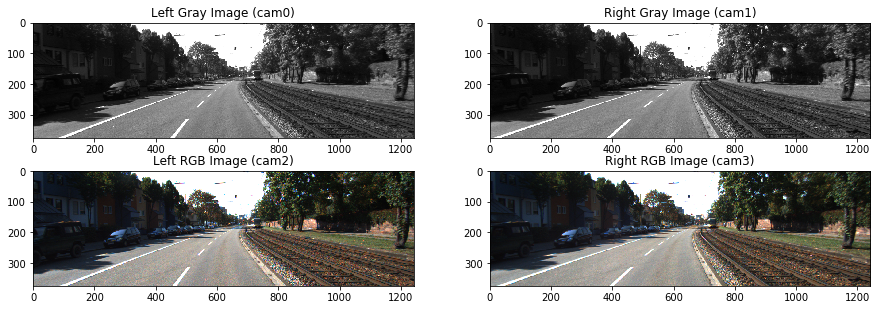

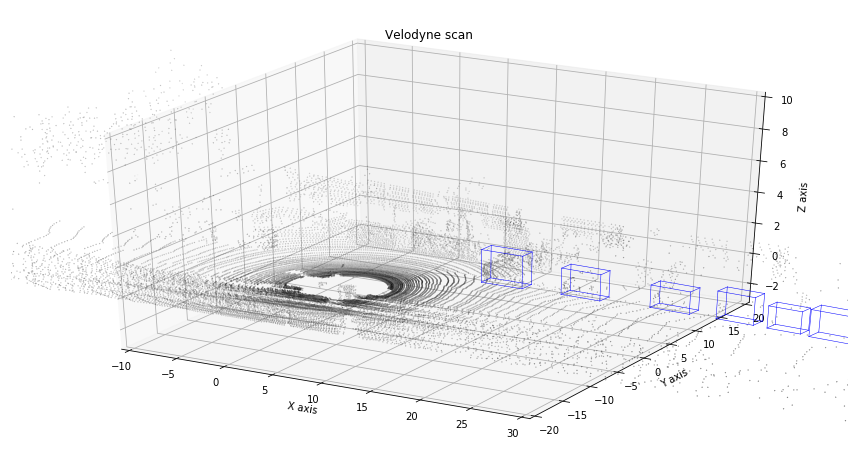

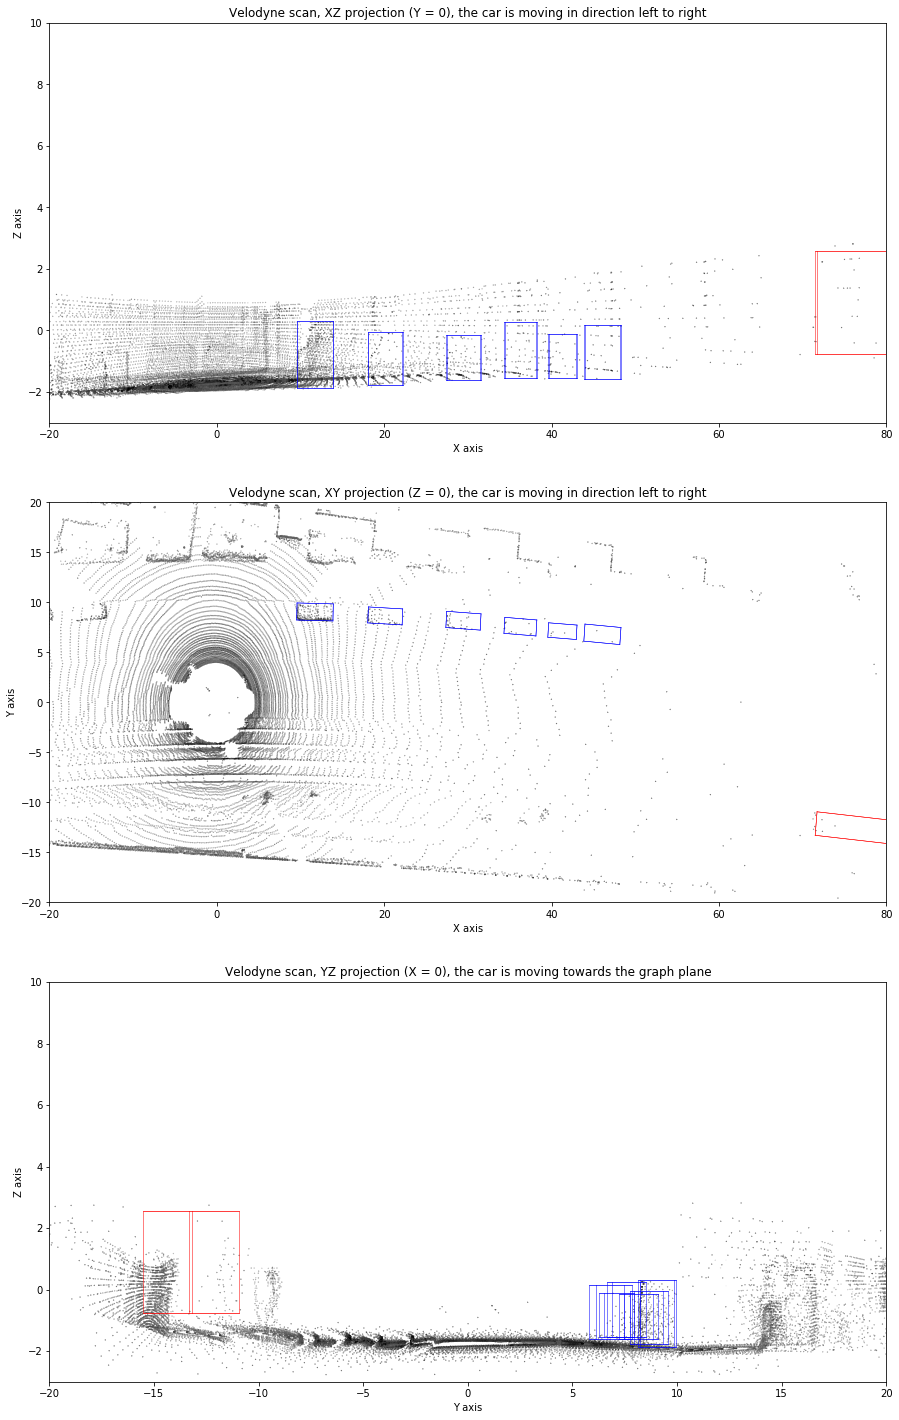

In [7]:
frame = 10

display_frame_statistics(dataset, tracklet_rects, tracklet_types, frame)

In [8]:
!mkdir video

In [10]:
def draw_3d_plot(frame, dataset, tracklet_rects, tracklet_types, points=0.2):
    """
    Saves a single frame for an animation: a 3D plot of the lidar data without ticks and all frame trackelts.
    Parameters
    ----------
    frame           : Absolute number of the frame.
    dataset         : `raw` dataset.
    tracklet_rects  : Dictionary with tracklet bounding boxes coordinates.
    tracklet_types  : Dictionary with tracklet types.
    points          : Fraction of lidar points to use. Defaults to `0.2`, e.g. 20%.

    Returns
    -------
    Saved frame filename.
    """
    dataset_velo = list(dataset.velo)
    
    f = plt.figure(figsize=(12, 8))
    axis = f.add_subplot(111, projection='3d', xticks=[], yticks=[], zticks=[])

    points_step = int(1. / points)
    point_size = 0.01 * (1. / points)
    velo_range = range(0, dataset_velo[frame].shape[0], points_step)
    velo_frame = dataset_velo[frame][velo_range, :]
    axis.scatter(*np.transpose(velo_frame[:, [0, 1, 2]]), s=point_size, c=velo_frame[:, 3], cmap='gray')
    axis.set_xlim3d(*axes_limits[0])
    axis.set_ylim3d(*axes_limits[1])
    axis.set_zlim3d(*axes_limits[2])
    for t_rects, t_type in zip(tracklet_rects[frame], tracklet_types[frame]):
        draw_box(axis, t_rects, axes=[0, 1, 2], color=colors[t_type])
    filename = 'video/frame_{0:0>4}.png'.format(frame)
    plt.savefig(filename)
    plt.close(f)
    return filename

frames = []
n_frames = len(list(dataset.velo))

print('Preparing animation frames...')
for i in range(n_frames):
    print_progress(i, n_frames - 1)
    filename = draw_3d_plot(i, dataset, tracklet_rects, tracklet_types)
    frames += [filename]
print('...Animation frames ready.')

clip = ImageSequenceClip(frames, fps=5)
% time
clip.write_videofile('pcl_data.mp4', fps=5)

Preparing animation frames...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
...Animation frames ready.
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.29 µs
[MoviePy] >>>> Building video pcl_data.mp4
[MoviePy] Writing video pcl_data.mp4


100%|██████████| 108/108 [00:02<00:00, 53.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: pcl_data.mp4 

